## Before training preprocessing
These steps are done before training the model. The dataset is loaded and preprocessed.

In [87]:
from preprocessed_dataset import PreprocessedDataset
dataset = PreprocessedDataset()

2024-03-25 11:14:32.880264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [4]
	 [[{{node Placeholder/_0}}]]
2024-03-25 11:14:32.880460: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [4]
	 [[{{node Placeholder/_1}}]]


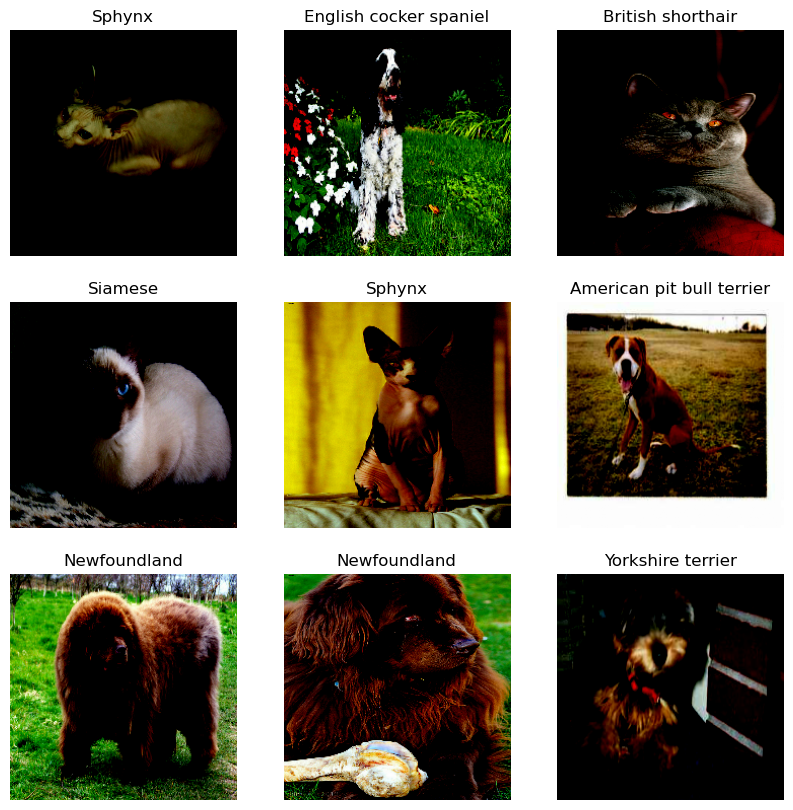

In [88]:
dataset.visualize_preprocessed_images()